<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

## Chatbot: catégorisations et prévisions des réponses aux questions

# Text Mining & Clustering <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="R"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="R"/></a>

In [1]:
import unicodedata 
import time
import pandas as pd
import numpy as np
import random
import nltk
import collections
import itertools
import csv
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.cross_validation import train_test_split
import sys 
from sklearn.decomposition import TruncatedSVD
from bs4 import BeautifulSoup #Nettoyage d'HTML
import re # Regex
import nltk # Nettoyage des données
from os import path
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.metrics import *
from sklearn import metrics
from sklearn import datasets

C:\Users\ETIENNE\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Repartition des données initiales

In [2]:
# Variable Globale
HEADER_TEST = ['Question','Intent','BlockId', 'Action']
HEADER_TRAIN =['Question','Intent','BlockId', 'Action']
data_all = pd.read_csv("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/INSA_wefight_data_clean.csv",sep=",",names=HEADER_TRAIN,nrows=5014)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013 entries, 0 to 5012
Data columns (total 4 columns):
Question    5013 non-null object
Intent      5013 non-null object
BlockId     5013 non-null object
Action      4919 non-null object
dtypes: object(4)
memory usage: 156.7+ KB


In [3]:
intents = pd.Series(data_all['Intent'])
A=intents.value_counts(sort=True)
print "Nombre de catégories"
print len(A) #nb de categories

Nombre de catégories
146


In [4]:
print "noms des categ et nb d'occurrence"
A #categ et leurs nb d'occurrences

noms des categ et nb d'occurrence


#6-49_TRTEINS_Peau                             215
#6-97_TRTEINS_Nausees_Vomissements             141
#6-92_TRTEINS_Diarrhee                         139
#2-130_QVDP_Alimentation                       132
#6-53_TRTEINS_Aphtes                           125
#6-90_TRTEINS_Mauvais_Gout                     119
#6-98_TRTEINS_EI_Frequents                     113
#2-36_QVDP_Alopecie_Pourquoi                   112
#6-60_TRTEINS_PAC                              106
#9-2_Informations_cancer                       105
#6-18_TRTEINS_Radiotherapie                     93
#2-64-0_QVDP_Fatigue                            92
#6-57_TRTEINS_Yeux_Secs                         91
#2-55_QVDP_Douleur                              88
conversation_rappel_rendezvous                  86
#6-96_TRTEINS_Perte_Poids                       83
#2-45_QVDP_Alopecie_Perruque                    83
#6-1_TRTEINS_Chimiotherapie                     81
#2-96_QVDP_Social_Priseencharge                 78
#6-58_TRTEINS_Bouche_Seche     

## Repartition des sous catégories

In [5]:
liste=[]
j=0
val=[]
for i in range(5013):
    if not(intents[i] in liste):
        liste.append(intents[i])
liste.remove('intent')
for i in (liste):
    val.append(A[i])
    j=j+1

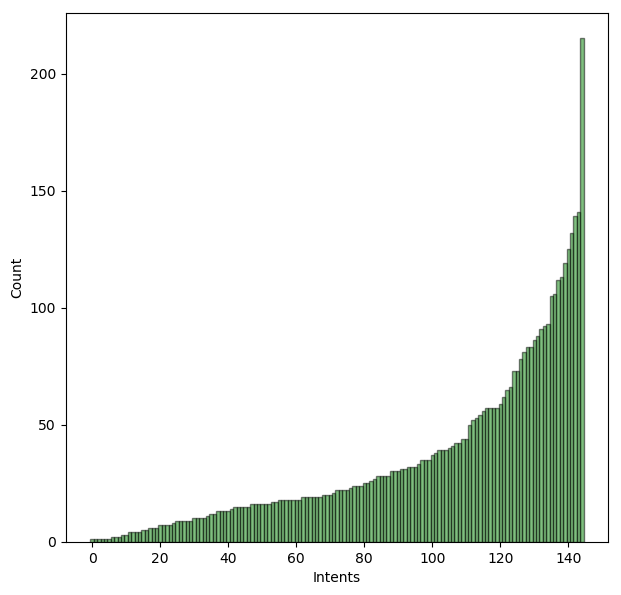

In [6]:
val.sort()
plt.figure(figsize=(7,7),dpi=100)
x = range(145)
y = val
plt.bar(x, y, width=1, alpha=0.5, color="green", edgecolor="black")
xlabel("Intents")
ylabel("Count")
plt.show()

## Repartition des meta catégories

{'profile': 36, 'conversation': 150, 'qvdp': 2100, 'gestion': 51, 'traitement': 2230, 'soutien': 56, 'menu': 71, 'information': 219, 'ddp': 36, 'qvda remission recidive': 62}


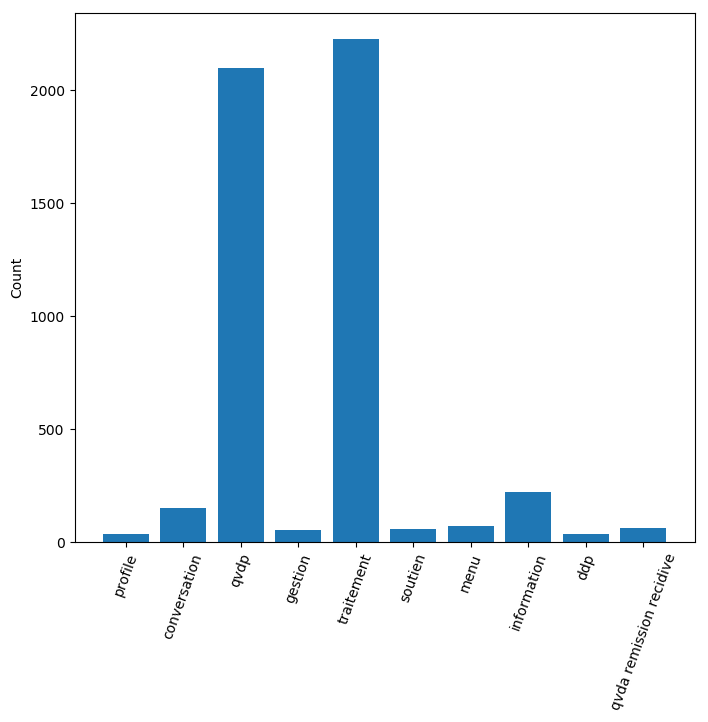

In [7]:
meta_categ={"profile":0, "conversation":0, "gestion":0,"menu":0,"qvdp":0,"soutien":0,
            "traitement":0,"qvda remission recidive":0,"ddp":0,"information":0}

for i in range(5012):
    if intents[i][0]=='P':#profile
        meta_categ["profile"] += 1
    if (intents[i][0]=='C' or intents[i][0]=='c') :#conversation
        meta_categ["conversation"] += 1
    if intents[i][1]=='0':#gestion
        meta_categ["gestion"] += 1
    if intents[i][1]=='1':#menu
        meta_categ["menu"] += 1
    if intents[i][1]=='2': #qvdp
        meta_categ["qvdp"] += 1
    if intents[i][1]=='5':#soutien
        meta_categ["soutien"] += 1
    if intents[i][1]=='6':#traitement
        meta_categ["traitement"] += 1
    if intents[i][1]=='7': #qvda remission recidive
        meta_categ["qvda remission recidive"] += 1
    if intents[i][1]=='8': #ddp
        meta_categ["ddp"] += 1
    if intents[i][1]=='9':#information
        meta_categ["information"] += 1
        
print meta_categ

plt.figure(figsize=(8,7),dpi=100)
plt.bar(range(len(meta_categ)), (meta_categ.values()), align='center')
plt.xticks(range(len(meta_categ)), (meta_categ.keys()),rotation = 70)
ylabel("Count")
plt.show()

# Importation et séparation des données 

In [8]:
# Répertoire de travail
DATA_DIR = "C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/INSA_wefight_data_clean.csv"
# Nom des fichiers
training_reduit_path = DATA_DIR 

   ### Read & Split Dataset
   Fonction permettant de lire le fichier d'apprentissage et de créer deux DataFrame Pandas, un pour l'apprentissage, l'autre pour la validation.
   La première méthode créée un DataFrame en lisant entièrement le fichier. Puis elle scinde le DataFrame en deux  grâce à la fonction dédiée de sklearn. 

In [9]:
def split_dataset(input_path, nb_line, tauxValid,columns):
    time_start = time.time()
    data_all = pd.read_csv(input_path,sep=",",names=columns,nrows=nb_line) #cree data frame
    data_all = data_all.fillna("") #remplace les na par " "
    data_train, data_valid = train_test_split(data_all, test_size = tauxValid) # Split arrays or matrices into random train and test subsets
    time_end = time.time()
    print("Split Takes %d s" %(time_end-time_start))
    return data_train, data_valid

nb_line=20000  # part totale extraite du fichier initial ici déjà réduit
tauxValid=0.10 # part totale extraite du fichier initial ici déjà réduit
data_train, data_valid = split_dataset(training_reduit_path, nb_line, tauxValid, HEADER_TRAIN)
# Cette ligne permet de visualiser les 5 premières lignes de la DataFrame 
data_train.head(5)

Split Takes 0 s


,Question,Intent,BlockId,Action
1337,remboursement perruque,#2-48_QVDP_Alopecie_RbPerruque,59843995e4b03f0d12f4293a,
1833,est-ce que je peux prendre des médicaments pou...,#2-70_QVDP_Fatigue_Diminuer,59846299e4b03f0d14154cf5,wiki_cancer
326,chimiothérapie tératogénécité,#2-109_QVDP_Grossesse_Chimiotherapie,598d6e70e4b03f0d40baca04,wiki_cancer
2066,Menstruation pendant le cancer,#2-88_Reprise_Cycle,598b4192e4b03f0d36cad200,wiki_cancer
3634,douleur apres operation de ganglion sentinelle,#6-73_TRTEINS_Chirurgie_Curage_axillaire,59919488e4b0feb288b498e5,wiki_cancer


#### Wordcloud sur les données non nettoyées

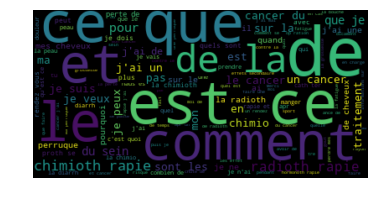

In [10]:
description2 = data_train["Question"]
description2.to_csv('Question.csv',sep = ',')

text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=80).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

 Nous avons effectué un wordcloud sur l'ensemble de nos données non nettoyées. Nous remarquons que les mots les plus importants sont des déterminants comme "le", "ce", "la", "de" ou des mots caractérisants les questions dans la langue française comme "que", "comment" ou le verbe être. Ces mots ne nous permettent pas de caractériser un domaine relatif à une question. Nous allons donc nettoyer nos données afin de garder uniquement les mots censés être discriminants.

# Nettoyage des données

Afin de limiter la dimension de l'espace des variables ou *features*, tout en conservant les informations essentielles, il est nécessaire de nettoyer les données en appliquant plusieurs étapes:
* Chaque mot est écrit en minuscule.
* Les termes numériques, de ponctuation et autres symboles sont supprimés.
* 155 mots-courants, et donc non informatifs, de la langue française sont supprimés (STOPWORDS). Ex: le, la, du, alors, etc...
* Chaque mot est "racinisé", via la fonction `STEMMER.stem` de la librairie nltk. La racinisation transforme un mot en son radical ou sa racine. Par exemple, les mots: cheval, chevaux, chevalier, chevalerie, chevaucher sont tous remplacés par "cheva".

In [11]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
nltk_stopwords = nltk.corpus.stopwords.words('french') 
## Depuis Un fichier externe.
lucene_stopwords = [unicode(w, "utf-8") for w in open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/lucene_stopwords.txt").read().split(",")] #En local

## Union des deux fichiers de stopwords 
stopwords = list(set(nltk_stopwords).union(set(lucene_stopwords)))

## Fonction de setmming de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')


def clean_marque(txt):
    txt = re.sub('[^a-zA-Z0-9]', '_', txt).lower()
    return txt

### Fonction de nettoyage de texte avec ajout des stopwords supplémentaires identifiés
Fonction qui prend en intrée un texte et retourne le texte nettoyé en appliquant successivement les étapes suivantes: Nettoyage des données HTML, conversion en texte minuscule, encodage uniforme, suppression des caractéres non alpha numérique (ponctuations), suppression des stopwords, racinisation de chaque mot individuellement.

In [12]:
#stopwords_perso = ["veux", "apres", "faire", "peux", "dois", "vais", "peut", "fait"]
#stopwords3 = list(set(stopwords).union(set(stopwords_perso)))

# Fonction clean générale
def clean_txt2(txt):
    ### remove html stuff
    txt = BeautifulSoup(txt,"html.parser",from_encoding='utf-8').get_text() #nettoyage donnee html
    ### lower case
    txt = txt.lower()
    ### special escaping character '...'
    txt = txt.replace(u'\u2026','.')
    txt = txt.replace(u'\u00a0',' ')
    ### remove accent btw
    txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore')
    ###txt = unidecode(txt)
    ### remove non alphanumeric char
    txt = re.sub('[^a-z_]', ' ', txt)
    ### remove french stop words
    #stopwords2=[stemmer.stem(stop) for stop in stopwords3]
    tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords)]
    ### french stemming
    tokens = [stemmer.stem(token) for token in tokens]
    #tokens= [w for w in tokens if (len(w)>2) and (w not in stopwords2)]
    #Stemmers remove morphological affixes from words, leaving only the word stem
    ### tokens = stemmer.stemWords(tokens)
    return ' '.join(tokens)
    #join() returns a string in which the string elements of sequence have been joined by str separator.

    # fonction de nettoyage du fichier(stemming et liste de mots à supprimer)
def clean_df2(input_data, column_names= ['Question','Intent','BlockId', 'Action']):
    #Test if columns entry match columns names of input data
    column_names_diff= set(column_names).difference(set(input_data.columns))
    #set.difference   new set with elements in column_names but not in input_data.columns
    
    if column_names_diff: #rentre dans la boucle si column_names différent zero
        # warning = exception
        warnings.warn("Column(s) '"+", ".join(list(column_names_diff)) +"' do(es) not match columns of input data", Warning)
        
    nb_line = input_data.shape[0]
    print("Start Clean %d lines" %nb_line)
    
    # Cleaning start for each columns
    time_start = time.time()
    clean_list=[]
    for column_name in column_names:
        column = input_data[column_name].values
        if column_name == "Question":
            array_clean = np.array(map(clean_txt2,column))
            
        elif column_name == "Intent":
            array_clean = np.asarray(input_data['Intent']) #on recopie telle quelle la colonne intent  
            
        else:
            array_clean = np.array(map(clean_marque,column))
            #applies a function to all the items in an input_list
            #map(function_to_apply, list_of_inputs)
        clean_list.append(array_clean)
    time_end = time.time()
    print("Cleaning time: %d secondes"%(time_end-time_start))
    
    #Convert list to DataFrame
    array_clean = np.array(clean_list).T
    data_clean = pd.DataFrame(array_clean, columns = column_names)
    return data_clean

In [13]:
#dissociation du data training et validation
data_valid_clean = clean_df2(data_valid)
data_train_clean = clean_df2(data_train)

Start Clean 502 lines
Cleaning time: 0 secondes
Start Clean 4511 lines
Cleaning time: 3 secondes


### DataFrame d'apprentissage après nettoyage.

In [14]:
#info sur les données
data_train_clean.info()
data_train_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 4 columns):
Question    4511 non-null object
Intent      4511 non-null object
BlockId     4511 non-null object
Action      4511 non-null object
dtypes: object(4)
memory usage: 141.0+ KB


,Question,Intent,BlockId,Action
0,rembours perruqu,#2-48_QVDP_Alopecie_RbPerruque,59843995e4b03f0d12f4293a,
1,prendr medic dorm trait canc,#2-70_QVDP_Fatigue_Diminuer,59846299e4b03f0d14154cf5,wiki_cancer
2,chimiotherap teratogenecit,#2-109_QVDP_Grossesse_Chimiotherapie,598d6e70e4b03f0d40baca04,wiki_cancer
3,menstruat canc,#2-88_Reprise_Cycle,598b4192e4b03f0d36cad200,wiki_cancer
4,douleur oper ganglion sentinel,#6-73_TRTEINS_Chirurgie_Curage_axillaire,59919488e4b0feb288b498e5,wiki_cancer


Nous remarquons d'après l'affichage des 5 premières lignes après nettoyage que les mots importants des données avant nettoyage ont disparu. En effet, il semble qu'il reste uniquement des mots caractérisants notre sujet et nos questions. De plus ces mots ont été racinisés afin de réunir des familles de mots. Nous allons maintenant appliquer de nouveau un worcloud sur l'ensemble de nos données nettoyées.

## Wordcloud sur : data train clean

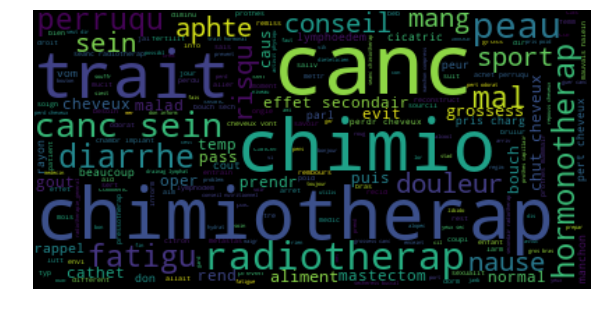

In [15]:
description = data_train_clean["Question"]
description.to_csv('Question.csv', sep = ',')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Nous avons effectué un wordcloud sur l'ensemble de nos données nettoyées. Nous remarquons que les mots les plus importants sont "chimiotherapie","cancer","faire","radiotherapie","traitement" et "sein". Ces mots correspondent à notre domaine il est donc logique de les voir apparaître souvent. Cependant, nous pouvons nous demander s'ils apparaissent souvent dans toutes les catégories ou seulement dans certaines catégories ? Nous allons donc effectuer un wordcloud sur une ou plusieurs catégories en particulier afin d'identifier les mots discriminants relatifs à cette catégorie.

## Wordcloud sur  la plus grande catégorie, Traitement peau : '#6-49_TRTEINS_Peau'

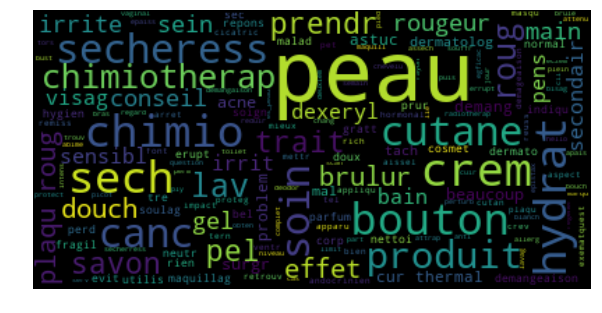

In [16]:
df = data_train_clean['Question'][data_train_clean['Intent'] == '#6-49_TRTEINS_Peau']
description2 = df
description2.to_csv('Intent.csv', sep = ',')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Intent.csv").read()
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 3 Construction des caractéristiques ou *features* (TF-IDF)¶
### Introduction
La vectorisation, c'est-à-dire la construction des caractéristiques à partir de la liste des mots se fait en 2 étapes:
* **Hashage**. Il permet de réduire l'espace des variables (taille du dictionnaire) en un nombre limité et fixé a priori `n_hash` de caractéristiques. Il repose sur la définition d'une fonction de hashage, $h$ qui à un indice $j$ défini dans l'espace des entiers naturels, renvoie un indice $i=h(j)$ dans dans l'espace réduit (1 à n_hash) des caractéristiques. Ainsi le poids de l'indice $i$, du nouvel espace, est l'association de tous les poids d'indice $j$ tels que $i=h(j)$ de l'espace originale. Ici, les poids sont associés d'après la méthode décrite par Weinberger et al. (2009).

N.B. $h$ n'est pas généré aléatoirement. Ainsi pour un même fichier d'apprentissage (ou de test) et pour un même entier n_hash, le résultat de la fonction de hashage est identique

* **TF-IDF**. Le TF-IDF permet de faire ressortir l'importance relative de chaque mot $m$ (ou couples de mots consécutifs) dans un texte-produit ou un descriptif $d$, par rapport à la liste entière des produits. La fonction $TF(m,d)$ compte le nombre d'occurences du mot $m$ dans le descriptif $d$. La fonction $IDF(m)$ mesure l'importance du terme dans l'ensemble des documents ou descriptifs en donnant plus de poids aux termes les moins fréquents car considérés comme les plus discriminants (motivation analogue à celle de la métrique du chi2 en anamlyse des correspondance). $IDF(m,l)=\log\frac{D}{f(m)}$ où $D$ est le nombre de documents, la taille de l'échantillon d'apprentissage, et $f(m)$ le nombre de documents ou descriptifs contenant le mot $m$. La nouvelle variable ou *features* est $V_m(l)=TF(m,l)\times IDF(m,l)$.

* Comme pour les transformations des variables quantitatives (centrage, réduction), la même transformation c'est-à-dire les mêmes pondérations, est calculée sur l'achantillon d'apprentissage et appliquée à celui de test.

In [17]:
stop_words = nltk.corpus.stopwords.words('french')
question = data_train_clean["Question"] #on va travailler que sur la colonne des questions
vec = TfidfVectorizer(
            min_df = 1,
            stop_words =stop_words,
            smooth_idf=True,
            norm='l2',
            sublinear_tf=True,
            use_idf=True, #tf avec idf
            ngram_range=(1,2)) #bi-grams
tfidf =  vec.fit_transform(question)

Le n gram range va delimiter le nombre de mot que l'on prend dans une ligne.
Remarque, si on a ngram(1,3) sur la phrase "ablation des parties" on a la sortie "ablation" "ablation des" "ablations des parties" Les mots seront ordonné en fonction de leur tfidf

## Wordcloud sur le tfidf

In [18]:
mot_disc2=dict(sorted(zip(vec.get_feature_names(),vec.idf_), key = lambda x: x[1]))

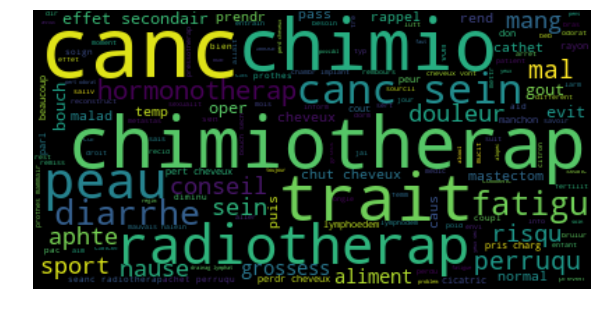

In [19]:
description = data_train_clean["Question"]
description.to_csv('Question.csv', sep = ',')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
frequencies= mot_disc2 #dict word-freq
wordcloud = WordCloud().generate_from_frequencies(frequencies)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

On remarque que nous obtenons plus ou moins le même worcloud que sans le TF-IDF. Le TF-IDF donne un score aux différents mots contenus dans le document. Plus le mot est présent dans le document plus son score sera faible. Logiquement, nous aurions souhaité que les mots "cancer", "chimiothérapie" ou "radiothérapie" soit écrit en tout petit dans notre wordcloud étant donné qu'ils sont très présent dans le document et nous aurions souhaité voir apparaître en plus gros des mots discriminants une catégorie. Nous pouvons tout de même conclure avec ce wordcloud que les mots "cancer", "chimiothérapie" et "radiothérapie" ont un score de TF-IDF élevé et cela peut s'expliquer par le fait qu'ils soient présents dans les catégories les plus fortes (fournies).

## PCA

In [20]:
stop_words = nltk.corpus.stopwords.words('french')
question = data_train_clean["Question"] #on va travailler que sur la colonne des questions
vec = TfidfVectorizer(
            min_df = 1, #on prend tous les mots
            stop_words =stop_words,
            smooth_idf=True,
            norm='l2',
            sublinear_tf=True,
            use_idf=True, #tf avec idf
            ngram_range=(1,1))
tfidf =  vec.fit_transform(question)

In [21]:
# définition de la commande
X = tfidf
nom = vec.get_feature_names() #on recupere le nom des variables
svd = TruncatedSVD(n_components=30, n_iter=40, random_state=42)
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=30, n_iter=40,
       random_state=42, tol=0.0)

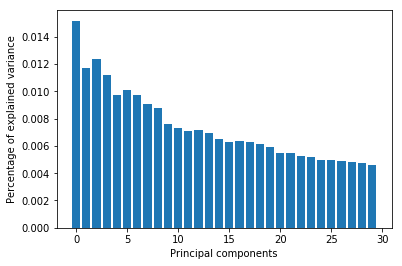

In [22]:
# Eboulis des valeurs propres
plt.figure()
abscisse = np.arange(30)
plt.bar(abscisse,svd.explained_variance_)
plt.xlabel("Principal components")
plt.ylabel("Percentage of explained variance" )
plt.show()

Nous remarquons d'après l'éboulis des valeurs propres que nous n'avons pas une composante qui explique bien nos données mais chacune des composantes (variables) est utile. Ainsi, l'ACP ne nous donneras pas un résultat très concluant mais nous allons quand même essayer. Nous remarquons cependant que 4 variables tirent l'informations, si on couple avec le graphe wordcloud on peut penser que ce sont cancer, chimiothérapie, radiothérapie et sein.

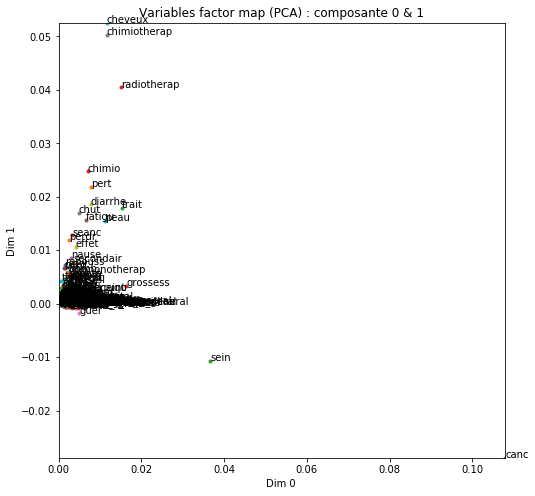

In [23]:
# composantes principales
C = svd.fit(X).transform(X)
#la svd affiche l'acp centree reduite
#on multiplie toutes nos composantes principales par une constante pour avoir des graphes plus visibles

#composante 0 & 1
coord10=svd.components_[0]*np.sqrt(svd.explained_variance_[0])
coord20=svd.components_[1]*np.sqrt(svd.explained_variance_[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

nom = vec.get_feature_names()
for i, j,nom in zip(coord10,coord20,nom):
    ax.plot(i, j, marker=".")
    ax.text(i, j,nom)
    #plt.arrow(0,0,i,j,color='r')
ax.set_xlim((min(coord10),max(coord10)))
ax.set_ylim((min(coord20),max(coord20)))

plt.title("Variables factor map (PCA) : composante 0 & 1")
ax.set_xlabel('Dim 0 ')
ax.set_ylabel('Dim 1')
plt.show()

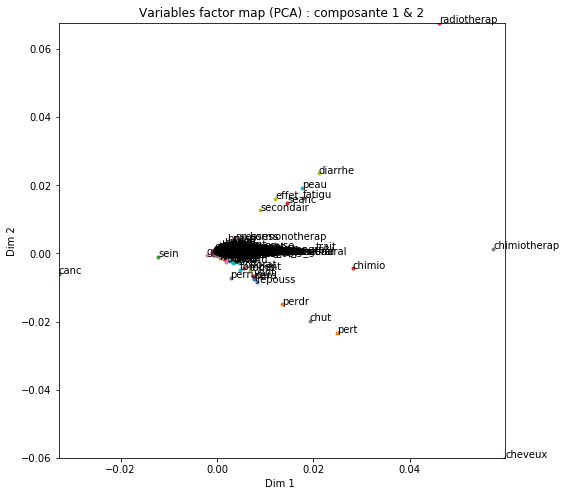

In [24]:
#composante 1 & 2
coord11=svd.components_[1]*np.sqrt(svd.explained_variance_[0])
coord21=svd.components_[2]*np.sqrt(svd.explained_variance_[1])

fig = plt.figure(figsize=(8,8)) # a enlever si on veut faire un subplot fourni
ax = fig.add_subplot(1, 1, 1)
nom = vec.get_feature_names()
for i, j,nom in zip(coord11,coord21,nom):
    ax.plot(i, j, marker=".")
    ax.text(i, j,nom)
    #plt.arrow(0,0,i,j,color='r')
ax.set_xlim((min(coord11),max(coord11)))
ax.set_ylim((min(coord21),max(coord21)))

plt.title("Variables factor map (PCA) : composante 1 & 2")
ax.set_xlabel('Dim 1 ')
ax.set_ylabel('Dim 2')
plt.show()

Nous remarquons en effet que les variables chimiothérapie, radiothérapie, cancer semblent jouer un rôle important dans la caractérisation de nos données. Nous remarquons également l'apparition de la variable cheveux dans les composantes principales. Nous souhaiterions maintenant pouvoir mieux comprendre les axes principaux et attribuer des catégories à un ou plusieurs axes. Pour cela nous allons représenter les individus dans le plan factoriel.

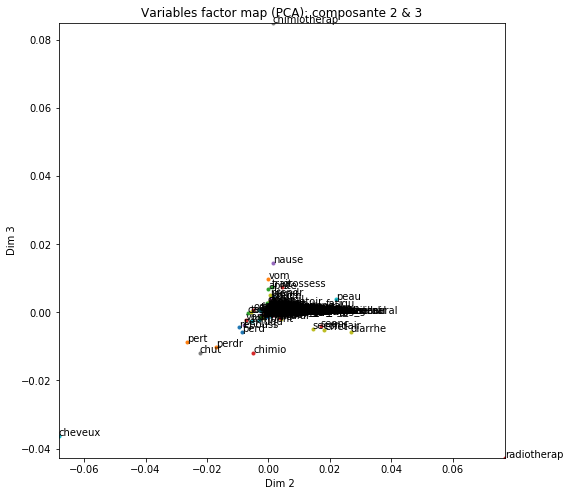

In [25]:
 #composante 2 & 3
coord12=svd.components_[2]*np.sqrt(svd.explained_variance_[0])
coord22=svd.components_[3]*np.sqrt(svd.explained_variance_[1])

fig = plt.figure(figsize=(8,8)) # a enlever si on veut faire un subplot fourni
ax = fig.add_subplot(1, 1, 1)
nom = vec.get_feature_names()
for i, j,nom in zip(coord12,coord22,nom):
    ax.plot(i, j, marker=".")
    ax.text(i, j,nom)
    #plt.arrow(0,0,i,j,color='r')
ax.set_xlim((min(coord12),max(coord12)))
ax.set_ylim((min(coord22),max(coord22)))

plt.title("Variables factor map (PCA): composante 2 & 3")
ax.set_xlabel('Dim 2 ')
ax.set_ylabel('Dim 3')
plt.show()

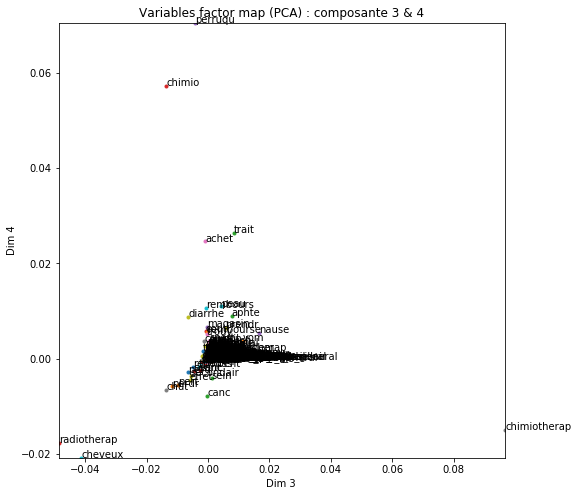

In [26]:
#composante 3 & 4
coord13=svd.components_[3]*np.sqrt(svd.explained_variance_[0])
coord23=svd.components_[4]*np.sqrt(svd.explained_variance_[1])

fig = plt.figure(figsize=(8,8)) # a enlever si on veut faire un subplot fourni
ax = fig.add_subplot(1, 1, 1)
nom = vec.get_feature_names()
for i, j,nom in zip(coord13,coord23,nom):
    ax.plot(i, j, marker=".")
    ax.text(i, j,nom)
    #plt.arrow(0,0,i,j,color='r')
ax.set_xlim((min(coord13),max(coord13)))
ax.set_ylim((min(coord23),max(coord23)))

plt.title("Variables factor map (PCA) : composante 3 & 4")
ax.set_xlabel('Dim 3 ')
ax.set_ylabel('Dim 4')
plt.show()

Pour les composantes 3 et 4 nous remarquons l'apparition de la variable perruque en plus de la présence des variables précédentes. Nous allons réaliser une ACP sur les 4 premiers plans factoriels afin de visualiser au mieux les liens entre les différentes variables et les catégories (individus).

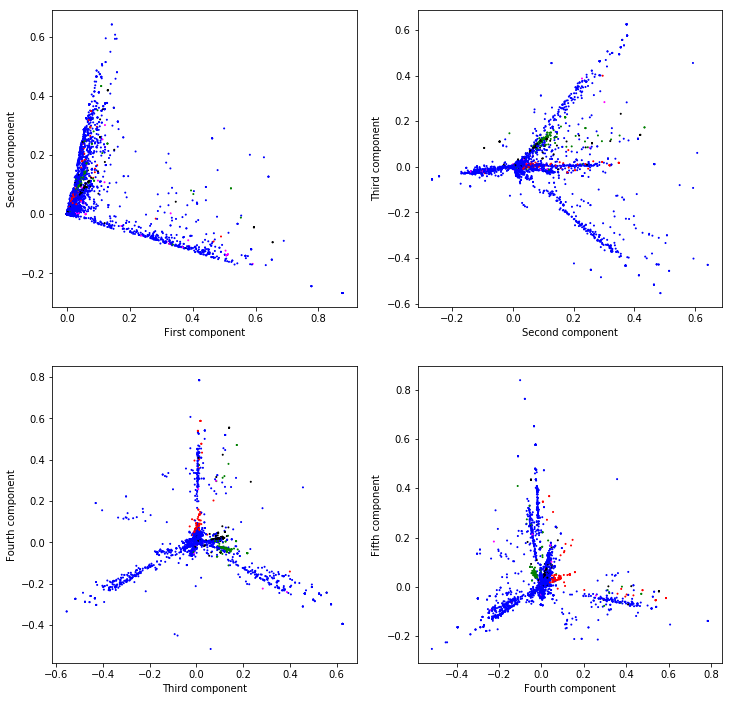

In [27]:
intent = data_train_clean["Intent"] # catégorie
color_seq = [] #liste de couleurs
#on associe à chaque individu une couleur en fonction de sa classe
for k in range(int(np.shape(question)[0])):
    if intent[k] == '#6-49_TRTEINS_Peau' : color_seq.append("black")
    elif intent[k] == '#6-97_TRTEINS_Nausees_Vomissements': color_seq.append("red")
    elif intent[k] == '#6-92_TRTEINS_Diarrhee': color_seq.append("green")
    elif intent[k] == '#2-130_QVDP_Alimentation': color_seq.append("magenta")
    else : color_seq.append("blue")

fig = plt.figure(figsize=(12,12))
# premier plan factoriel
ax = fig.add_subplot(2,2,1)
ax.scatter(C[:,0], C[:,1], s=1,c = color_seq)
plt.xlabel("First component")
plt.ylabel("Second component")
# deuxieme plan factoriel
ax = fig.add_subplot(2,2,2)
ax.scatter(C[:,1], C[:,2], s=1,c = color_seq)
plt.xlabel("Second component")
plt.ylabel("Third component")
# troisieme plan factoriel
ax = fig.add_subplot(2, 2, 3)
ax.scatter(C[:,2], C[:,3], s=1,c = color_seq)
plt.xlabel("Third component")
plt.ylabel("Fourth component")
# quatrieme plan factoriel
ax = fig.add_subplot(2, 2, 4)
ax.scatter(C[:,3], C[:,4], s=1,c = color_seq)
plt.xlabel("Fourth component")
plt.ylabel("Fifth component")
plt.show()

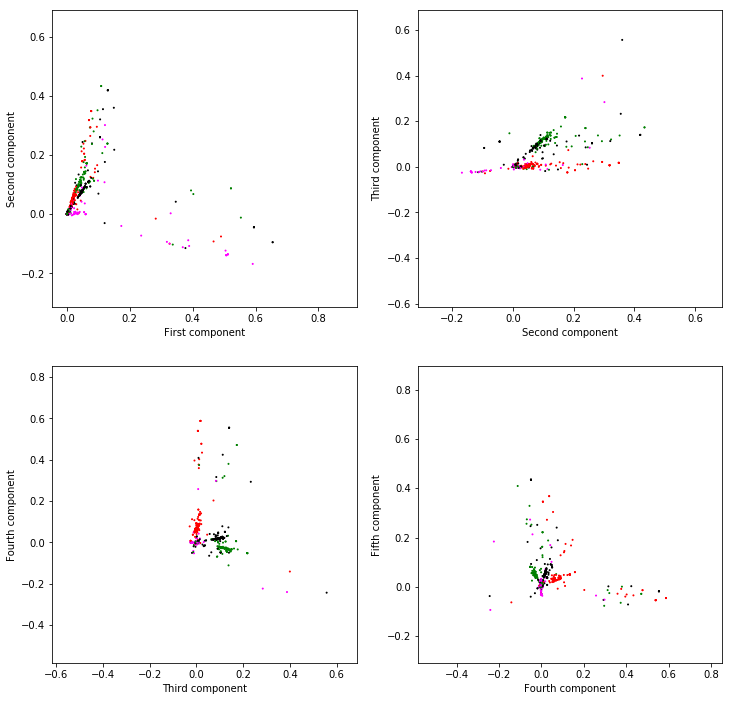

In [28]:
intent = data_train_clean["Intent"] # catégorie
color_seq = [] #liste de couleurs
#on associe à chaque individu une couleur en fonction de sa classe
for k in range(int(np.shape(question)[0])):
    if intent[k] == '#6-49_TRTEINS_Peau' : color_seq.append("black")
    elif intent[k] == '#6-97_TRTEINS_Nausees_Vomissements': color_seq.append("red")
    elif intent[k] == '#6-92_TRTEINS_Diarrhee': color_seq.append("green")
    elif intent[k] == '#2-130_QVDP_Alimentation': color_seq.append("magenta")
    else : color_seq.append("None")
        
fig = plt.figure(figsize=(12,12))
# premier plan factoriel
ax = fig.add_subplot(2,2,1)
ax.scatter(C[:,0], C[:,1], s=1,c = color_seq)
plt.xlabel("First component")
plt.ylabel("Second component")
# deuxieme plan factoriel
ax = fig.add_subplot(2,2,2)
ax.scatter(C[:,1], C[:,2], s=1,c = color_seq)
plt.xlabel("Second component")
plt.ylabel("Third component")
# troisieme plan factoriel
ax = fig.add_subplot(2, 2, 3)
ax.scatter(C[:,2], C[:,3], s=1,c = color_seq)
plt.xlabel("Third component")
plt.ylabel("Fourth component")
# quatrieme plan factoriel
ax = fig.add_subplot(2, 2, 4)
ax.scatter(C[:,3], C[:,4], s=1,c = color_seq)
plt.xlabel("Fourth component")
plt.ylabel("Fifth component")
plt.show()

Nous observons 2 grands axes qui se dégagent selon les composantes 0 et 1. Les individus jaunes (alimentation) semblent être présents selon la composante horizontale (cancer et sein). Nous remarquons trois grands axes sur le graphe des individus selon les composantes 1 et 2. Nous pouvons également relevé la présence des individus rouges (nausées et vomissement) autour de l'axe horizontale (chimiothérapie) ou celle des individus noirs et verts (traitement peau et traitement diarrée) autour de l'axe vertical (radiothérapie et diarrée). 

# Meta-categories

In [29]:
categories = data_train_clean['Intent']
#categories = data_all['Intent']
tailleCat = int(np.shape(categories)[0])
LabelCat = np.zeros(tailleCat)
for k in range(tailleCat):
    # la categorie #0 a le label 0 implicitement
    if categories[k][0:2]=='Pr':  LabelCat[k] = 11#profile
    if (categories[k][0:2] == 'co' or categories[k][0:2]=='Co'): LabelCat[k] = 10 #conversation_rappel_rendezvous
    if categories[k][0:2] == '#1' : LabelCat[k] = 1
    if categories[k][0:2] == '#2' : LabelCat[k] = 2
    if categories[k][0:2] == '#3' : LabelCat[k] = 3 ##il y a personne dedans 
    if categories[k][0:2] == '#4' : LabelCat[k] = 4  ## il y a personne dedans
    if categories[k][0:2] == '#5' : LabelCat[k] = 5
    if categories[k][0:2] == '#6' : LabelCat[k] = 6
    if categories[k][0:2] == '#7' : LabelCat[k] = 7
    if categories[k][0:2] == '#8' : LabelCat[k] = 8
    if categories[k][0:2] == '#9' : LabelCat[k] = 9
        
#data frame avec une colonne mettant un label suivant la meta categorie
dfLabelCat = pd.DataFrame(LabelCat)
meta_df = pd.concat([data_train_clean, dfLabelCat], axis=1)
meta_df.head()

,Question,Intent,BlockId,Action,0
0,rembours perruqu,#2-48_QVDP_Alopecie_RbPerruque,59843995e4b03f0d12f4293a,,2.0
1,prendr medic dorm trait canc,#2-70_QVDP_Fatigue_Diminuer,59846299e4b03f0d14154cf5,wiki_cancer,2.0
2,chimiotherap teratogenecit,#2-109_QVDP_Grossesse_Chimiotherapie,598d6e70e4b03f0d40baca04,wiki_cancer,2.0
3,menstruat canc,#2-88_Reprise_Cycle,598b4192e4b03f0d36cad200,wiki_cancer,2.0
4,douleur oper ganglion sentinel,#6-73_TRTEINS_Chirurgie_Curage_axillaire,59919488e4b0feb288b498e5,wiki_cancer,6.0


In [30]:
#on stocke les questions pour chaque cle, chaque cle sera une categorie
dix = []
neuf = []
huit = []
sept = []
six = []
cinq = []
quatre = []
trois = []
deux = []
un = []
zero = []
onze = []
for k in range(tailleCat):
    if meta_df[0][k] == 10.0 : dix.append(meta_df['Question'][k])
    if meta_df[0] [k] == 9.0 : neuf.append (meta_df['Question'][k])
    if meta_df[0][k] == 8.0 : huit.append (meta_df['Question'][k])
    if meta_df[0][k] == 7.0 : sept.append (meta_df['Question'][k])
    if meta_df[0][k] == 6.0 : six.append (meta_df['Question'][k])
    if meta_df[0][k] == 5.0 : cinq.append (meta_df['Question'][k])
    if meta_df[0][k] == 4.0 : quatre.append(meta_df['Question'][k])
    if meta_df[0][k] == 3.0 : trois.append (meta_df['Question'][k])
    if meta_df[0][k] == 2.0 : deux.append (meta_df['Question'][k])
    if meta_df[0][k] == 1.0 : un.append (meta_df['Question'][k])
    if meta_df[0][k] == 0.0 : zero.append (meta_df['Question'][k])
    if meta_df[0][k] == 11.0 : onze.append (meta_df['Question'][k])    
label = range(12)
questionLab = [zero,un,deux,trois,quatre,cinq,six,sept,huit,neuf,dix,onze]

meta_dict = dict(zip(label,questionLab)) # creation du dictionnaire

## Worcloud sur chaque méta-catégorie

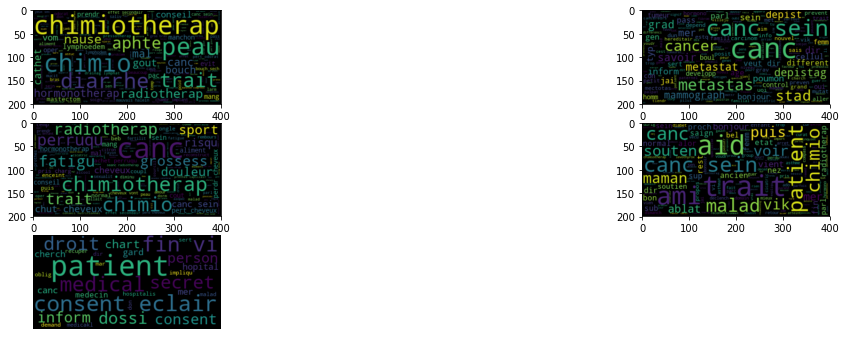

In [31]:
df1 = meta_df['Question'][meta_df[0] == 6.0]#traitements
df1.to_csv('Question.csv', sep = ',')
text1 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud1 = WordCloud().generate(text1)
wordcloud1 = WordCloud(max_font_size=60).generate(text1)

df2 = meta_df['Question'][meta_df[0] == 9.0]#information
description3 = df2
description3.to_csv('Question.csv', sep = ',')
text2 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud2 = WordCloud().generate(text2)
wordcloud2 = WordCloud(max_font_size=60).generate(text2)

df3 = meta_df['Question'][meta_df[0] == 2.0]#qvdp
df3.to_csv('Question.csv', sep = ',')
text3 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud3 = WordCloud().generate(text3)
wordcloud3 = WordCloud(max_font_size=60).generate(text3)

df4 = meta_df['Question'][meta_df[0] == 1.0]#menu
df4.to_csv('Question.csv', sep = ',')
text4 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud4 = WordCloud().generate(text4)
wordcloud4 = WordCloud(max_font_size=60).generate(text4)

df5 = meta_df['Question'][meta_df[0] == 8.0]#ddp
df5.to_csv('Question.csv', sep = ',')
text5 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud5 = WordCloud().generate(text5)
wordcloud5 = WordCloud(max_font_size=60).generate(text5)

df6 = meta_df['Question'][meta_df[0] == 7.0]#qvda remission recidive
description6 = df6
description6.to_csv('Question.csv', sep = ',')
text6 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud6 = WordCloud().generate(text6)
wordcloud6 = WordCloud(max_font_size=60).generate(text6)

df7 = meta_df['Question'][meta_df[0] == 11.0]#profile
description7 = df7
description7.to_csv('Question.csv', sep = ',')
text7 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud7 = WordCloud().generate(text7)
wordcloud7 = WordCloud(max_font_size=60).generate(text7)

df8 = meta_df['Question'][meta_df[0] == 0.0]#gestion
description8 = df8
description8.to_csv('Question.csv', sep = ',')
text8 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud8 = WordCloud().generate(text8)
wordcloud8 = WordCloud(max_font_size=60).generate(text8)

df9 = meta_df['Question'][meta_df[0] == 5.0]#soutien
description9 = df9
description9.to_csv('Question.csv', sep = ',')
text9 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud9 = WordCloud().generate(text9)
wordcloud9 = WordCloud(max_font_size=60).generate(text9)


df10 = meta_df['Question'][meta_df[0] == 10.0]#conversation
description10 = df10
description10.to_csv('Question.csv', sep = ',')
text10 = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
wordcloud10 = WordCloud().generate(text10)
wordcloud10 = WordCloud(max_font_size=60).generate(text10)

plt.figure(figsize=(20,10))
plt.subplot(521)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.subplot(522)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.subplot(523)
plt.imshow(wordcloud3, interpolation="bilinear")
plt.subplot(524)
plt.imshow(wordcloud4, interpolation="bilinear")
plt.subplot(525)
plt.imshow(wordcloud5, interpolation="bilinear")
plt.axis("off")
plt.show()


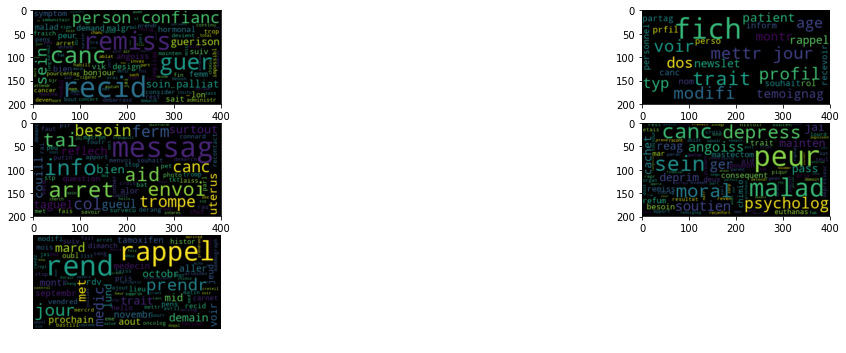

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(521)
plt.imshow(wordcloud6, interpolation="bilinear")
plt.subplot(522)
plt.imshow(wordcloud7, interpolation="bilinear")
plt.subplot(523)
plt.imshow(wordcloud8, interpolation="bilinear")
plt.subplot(524)
plt.imshow(wordcloud9, interpolation="bilinear")
plt.subplot(525)
plt.imshow(wordcloud10, interpolation="bilinear")
plt.axis("off")
plt.show()

We identify the biggest words of each meta-cluster wordcloud as keyword for this meta-cluster.

  Traitement : "chimiotherap", "nause", "peau, "diarrhe"

  Information : "canc", "sein", "metastas", "stad"
 
  Qvdp : "canc","perruqu", "chimio", "fatigu"

  Menu : "ami", "trait", "canc", "patient"

  Ddp : "patient", "consent", "medical", fin"
 
  Qvda : "recid", "remiss", "canc", "guer"
  
  Profile : "fich", "profil", "modifi"

  Gestion : "messag", "info", "arret, "besoin"
 
  Soutien : "malad", "peur", "moral", "depress"
 
  Conversation : "rappel", "rend", "prendr", "mard"
 

## PCA on meta-categories

In [33]:
meta = meta_df[0] # meta catégorie
color_seq = [] #liste de couleurs
#on associe à chaque individu une couleur en fonction de sa classe
for k in range(int(np.shape(meta_df['Question'])[0])):
    if meta[k] == 1.0 : color_seq.append("black")
    elif meta[k] == 2.0: color_seq.append("red")
    elif meta[k] == 11.0: color_seq.append("green")
    elif meta[k] == 10.0: color_seq.append("yellow")
    elif meta[k] == 5.0: color_seq.append("fuchsia")
    elif meta[k] == 6.0: color_seq.append("aqua")
    elif meta[k] == 7.0: color_seq.append("brown")
    elif meta[k] == 8.0: color_seq.append("indigo")
    elif meta[k] == 9.0: color_seq.append("lightblue")
    else : color_seq.append("blue")

In [34]:
X = tfidf
nom = vec.get_feature_names() #on recupere le nom des variables
svd = TruncatedSVD(n_components=30, n_iter=40, random_state=42)
svd.fit(X)

TruncatedSVD(algorithm='randomized', n_components=30, n_iter=40,
       random_state=42, tol=0.0)

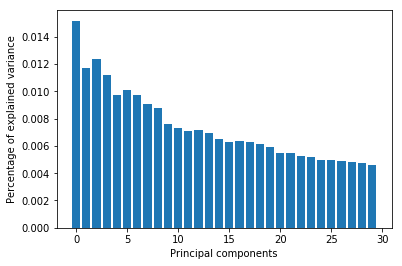

In [35]:
# Eboulis des valeurs propres
plt.figure()
abscisse = np.arange(30)
plt.bar(abscisse,svd.explained_variance_)
plt.xlabel("Principal components")
plt.ylabel("Percentage of explained variance" )
plt.show()

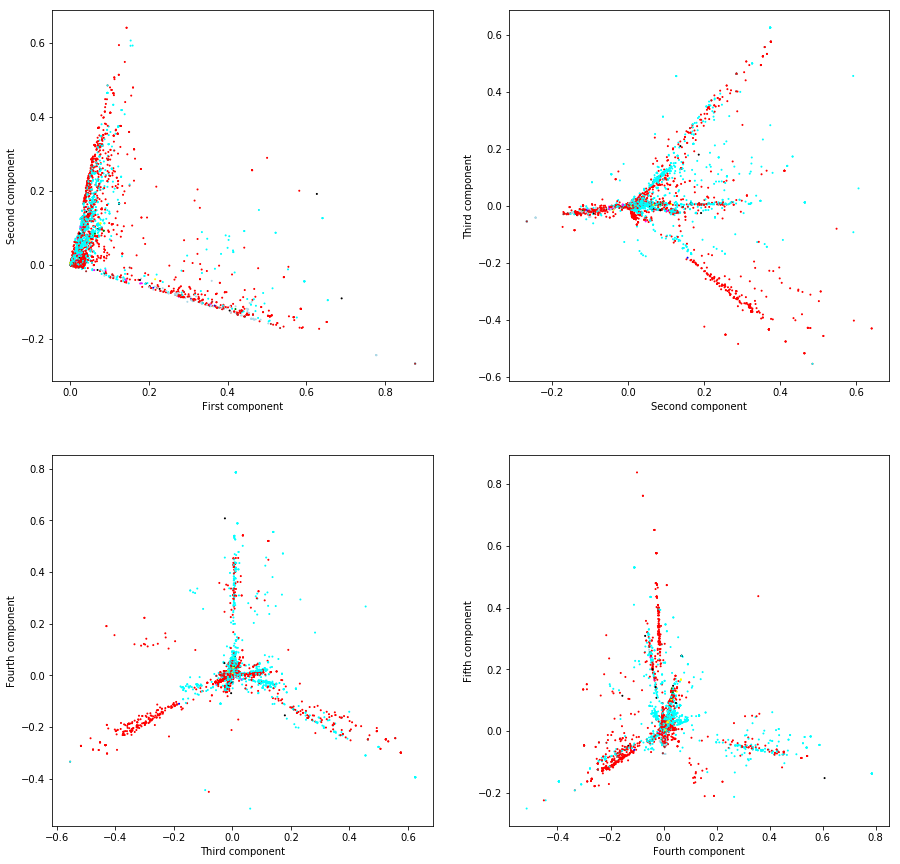

In [36]:
fig = plt.figure(figsize=(15,15))
# premier plan factoriel
ax = fig.add_subplot(2,2,1)
ax.scatter(C[:,0], C[:,1], s=1,c = color_seq)
plt.xlabel("First component")
plt.ylabel("Second component")
# deuxieme plan factoriel
ax = fig.add_subplot(2,2,2)
ax.scatter(C[:,1], C[:,2], s=1,c = color_seq)
plt.xlabel("Second component")
plt.ylabel("Third component")
# troisieme plan factoriel
ax = fig.add_subplot(2, 2, 3)
ax.scatter(C[:,2], C[:,3], s=1,c = color_seq)
plt.xlabel("Third component")
plt.ylabel("Fourth component")
# quatrieme plan factoriel
ax = fig.add_subplot(2, 2, 4)
ax.scatter(C[:,3], C[:,4], s=1,c = color_seq)
plt.xlabel("Fourth component")
plt.ylabel("Fifth component")
plt.show()

en bleu clair : la meta categ traitement 
    en rouge : QVDP
        les autres on les voit pas : dans la suite visualisons sans les deux categ les + fournies

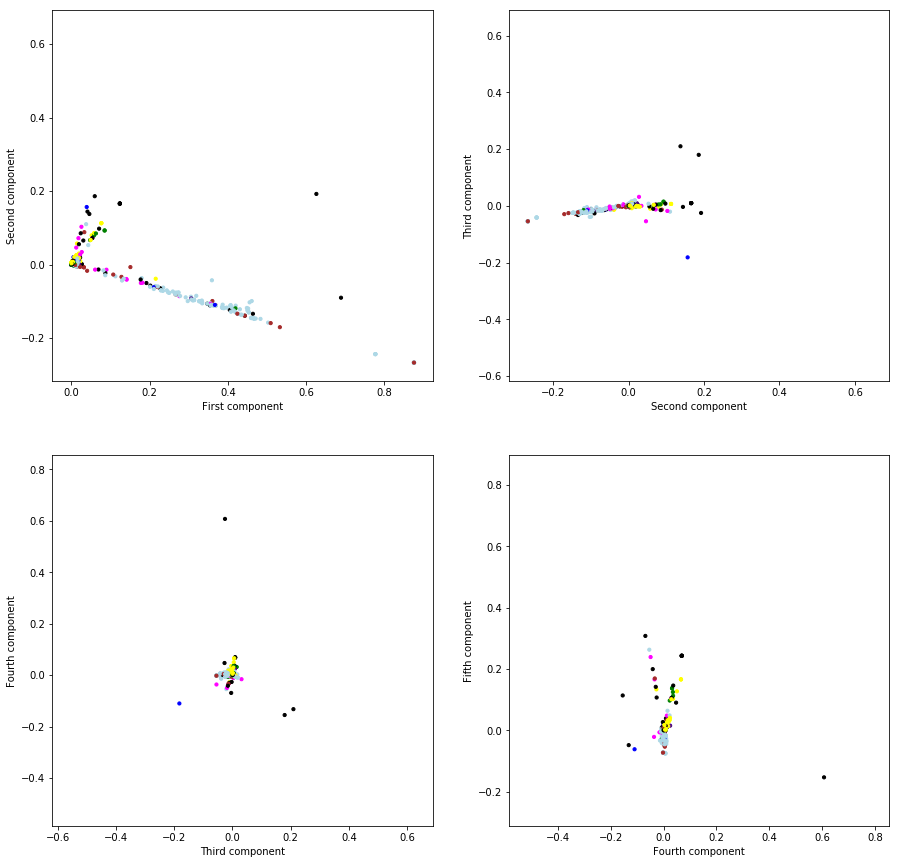

In [37]:
color_seq= [] #liste de couleurs
#on associe à chaque individu une couleur en fonction de sa classe
for k in range(int(np.shape(meta_df['Question'])[0])):
    if meta[k] == 1.0 : color_seq.append("black")
    elif meta[k] == 2.0: color_seq.append("None")
    elif meta[k] == 11.0: color_seq.append("green")
    elif meta[k] == 10.0: color_seq.append("yellow")
    elif meta[k] == 5.0: color_seq.append("fuchsia")
    elif meta[k] == 6.0: color_seq.append("None")
    elif meta[k] == 7.0: color_seq.append("brown")
    elif meta[k] == 8.0: color_seq.append("indigo")
    elif meta[k] == 9.0: color_seq.append("lightblue")
    else : color_seq.append("blue")
        
fig = plt.figure(figsize=(15,15))
# premier plan factoriel
ax = fig.add_subplot(2,2,1)
ax.scatter(C[:,0], C[:,1], s=10,c = color_seq)
plt.xlabel("First component")
plt.ylabel("Second component")
# deuxieme plan factoriel
ax = fig.add_subplot(2,2,2)
ax.scatter(C[:,1], C[:,2], s=10,c = color_seq)
plt.xlabel("Second component")
plt.ylabel("Third component")
# troisieme plan factoriel
ax = fig.add_subplot(2, 2, 3)
ax.scatter(C[:,2], C[:,3], s=10,c = color_seq)
plt.xlabel("Third component")
plt.ylabel("Fourth component")
# quatrieme plan factoriel
ax = fig.add_subplot(2, 2, 4)
ax.scatter(C[:,3], C[:,4], s=10,c = color_seq)
plt.xlabel("Fourth component")
plt.ylabel("Fifth component")
plt.show()

### Essayons maintenant d'affiner notre classification avec l'ajout de stopwords en fonction des méta catégories

Nous avons 10 méta-catégories et 146 sous catégories. Nous allons effectuer des wordcloud pour chaque méta-catégorie. Avec ces wordcloud nous essayerons de repérer les 3-4 mots les plus représentatifs de la méta-catégorie. Ces mots sont par définition présents dans les sous catégories de la méta-catégorie. Nous allons donc rajouter ces mots aux stopwords afin d'affiner notre discrimination envers les sous catégories.

In [38]:
#Création base de données non nettoyées
categories = data_all['Intent']
tailleCat = int(np.shape(categories)[0])
LabelCat = np.zeros(tailleCat)
for k in range(tailleCat):
    # la categorie #0 a le label 0 implicitement
    if categories[k][0:2]=='Pr':  LabelCat[k] = 11#profile
    if (categories[k][0:2] == 'co' or categories[k][0:2]=='Co'): LabelCat[k] = 10 #conversation_rappel_rendezvous
    if categories[k][0:2] == '#1' : LabelCat[k] = 1
    if categories[k][0:2] == '#2' : LabelCat[k] = 2
    if categories[k][0:2] == '#5' : LabelCat[k] = 5
    if categories[k][0:2] == '#6' : LabelCat[k] = 6
    if categories[k][0:2] == '#7' : LabelCat[k] = 7
    if categories[k][0:2] == '#8' : LabelCat[k] = 8
    if categories[k][0:2] == '#9' : LabelCat[k] = 9

#data frame avec une colonne mettant un label suivant la meta categorie
dfLabelCat = pd.DataFrame(LabelCat)
data_all2=data_all.drop(data_all.index[0])
meta_df = pd.concat([data_all, dfLabelCat], axis=1)
meta_df1= meta_df.drop(meta_df.index[0])
meta_df1.head()

,Question,Intent,BlockId,Action,0
1,Quelles sont les signes du cancer de l'utérus,#000_Menu_General,59e5f626e4b0662e79d70343,wiki_cancer,0.0
2,En savoir plus 🔎,#000_Menu_General,59e5f626e4b0662e79d70343,wiki_cancer,0.0
3,Comment peux tu m aider par apport à ma question,#000_Menu_General,59e5f626e4b0662e79d70343,wiki_cancer,0.0
4,+ infos,#000_Menu_General,59e5f626e4b0662e79d70343,wiki_cancer,0.0
5,Je me suis tromper,#000_Menu_General,59e5f626e4b0662e79d70343,wiki_cancer,0.0


Nous voulons nettoyer les données différemment selon leur méta catégorie pour ensuite avoir une meilleure discrimination des sous catégories

## Cas catégorie 6

In [39]:
meta_df11=meta_df1[meta_df1[0]==6.0]
stopwords_perso = ["chimiotherapie", "peau", "nausee", "diarrhee"]

In [40]:
## Fonction de setmming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
stopwords2 = list(set(stopwords).union(set(stopwords_perso)))

# Fonction clean générale
def clean_txt_cat6(txt):
    ### remove html stuff
    txt = BeautifulSoup(txt,"html.parser",from_encoding='utf-8').get_text() #nettoyage donnee html
    ### lower case
    txt = txt.lower()
    ### special escaping character '...'
    txt = txt.replace(u'\u2026','.')
    txt = txt.replace(u'\u00a0',' ')
    ### remove accent btw
    txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore')
    ###txt = unidecode(txt)
    ### remove non alphanumeric char
    txt = re.sub('[^a-z_]', ' ', txt)
    ### remove french stop words
    tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords2)]
    ### french stemming
    tokens = [stemmer.stem(token) for token in tokens]
    #Stemmers remove morphological affixes from words, leaving only the word stem
    ### tokens = stemmer.stemWords(tokens)
    return ' '.join(tokens)
    #join() returns a string in which the string elements of sequence have been joined by str separator.

    # fonction de nettoyage du fichier(stemming et liste de mots à supprimer)
def clean_df2_cat6(input_data, column_names= ['Question','Intent','BlockId', 'Action']):
    #Test if columns entry match columns names of input data
    column_names_diff= set(column_names).difference(set(input_data.columns))
    #set.difference   new set with elements in column_names but not in input_data.columns
    
    if column_names_diff: #rentre dans la boucle si column_names différent zero
        # warning = exception
        warnings.warn("Column(s) '"+", ".join(list(column_names_diff)) +"' do(es) not match columns of input data", Warning)
        
    nb_line = input_data.shape[0]
    print("Start Clean %d lines" %nb_line)
    
    # Cleaning start for each columns
    time_start = time.time()
    clean_list=[]
    for column_name in column_names:
        column = input_data[column_name].values
        if column_name == "Question":
            array_clean = np.array(map(clean_txt2,column))
            
        elif column_name == "Intent":
            array_clean = np.asarray(input_data['Intent']) #on recopie telle quelle la colonne intent  
            
        else:
            array_clean = np.array(map(clean_marque,column))
            #applies a function to all the items in an input_list
            #map(function_to_apply, list_of_inputs)
        clean_list.append(array_clean)
    time_end = time.time()
    print("Cleaning time: %d secondes"%(time_end-time_start))
    
    #Convert list to DataFrame
    array_clean = np.array(clean_list).T
    data_clean = pd.DataFrame(array_clean, columns = column_names)
    return data_clean

 
meta_df_clean=clean_df2_cat6(meta_df11)

Start Clean 2230 lines
Cleaning time: 2 secondes


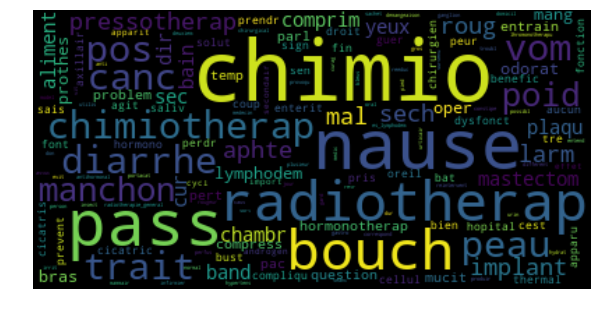

In [41]:
df = meta_df_clean['Question'][data_train_clean['Intent'] == '#6-49_TRTEINS_Peau']
description2 = df
description2.to_csv('Intent.csv', sep = ';')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Intent.csv").read()  
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

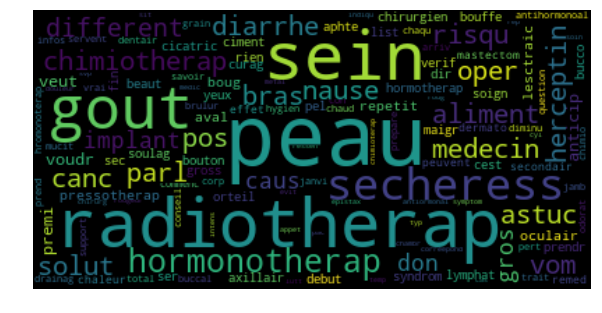

In [42]:
df = meta_df_clean['Question'][data_train_clean['Intent'] == '#6-90_TRTEINS_Mauvais_Gout']
description2 = df
description2.to_csv('Intent.csv', sep = ';')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Intent.csv").read()  
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=60).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Technique de concaténation
Nous allons concatener toutes les questions d'une même sous catégorie afin de n'avoir plus qu'une question par sous catégorie

In [43]:
intents = pd.Series(data_train_clean['Intent'])
A=intents.value_counts(sort=True)
new_data = []
for k,v in data_train_clean.groupby("Intent"):
    all_string = " ".join(v["Question"].values)
    new_row = [all_string, k]
    new_data.append(new_row)
new_df = pd.DataFrame(new_data, columns=["Question","Intent"])
mot_disc2=dict(sorted(zip(vec.get_feature_names(),vec.idf_), key = lambda x: x[1]))

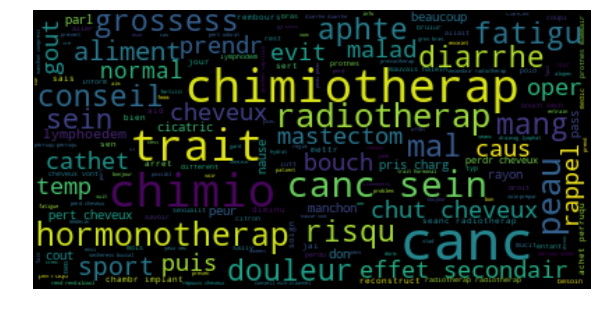

In [44]:
description = new_df["Question"]
description.to_csv('Question.csv', sep = ',')
text = open("C:/Users/ETIENNE/Documents/Work/INSA/4A/Projets 4gmm 2018/chatbot-master/Question.csv").read()
frequencies= mot_disc2 #dict word-freq
wordcloud = WordCloud().generate_from_frequencies(frequencies)
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Prédiction

In [45]:
def vectorizer_train(df,column):
    col = df[column]
    vec = TfidfVectorizer(min_df = 1, stop_words =stopwords, smooth_idf=True,norm='l2',sublinear_tf=True,use_idf=True,ngram_range=(1,1)) 
    tfidf=vec.fit_transform(col)
    return vec,tfidf

def apply_vectorizer(df, vec, columns):
    data_hash = map(lambda x : " ".join(x), df[columns].values)  
    tfidf=vec.transform(df[columns])
    return tfidf

## Prédiction sur les données nettoyées avec les stopwords supplémentaires

In [46]:
vec,X = vectorizer_train(data_train_clean,"Question")
Y = data_train_clean["Intent"].values #les étiquettes : les catégories
Xv = apply_vectorizer(data_valid_clean,vec,"Question")
Yv = data_valid_clean["Intent"].values

In [47]:
# Regression Logistique 
## estimation
from sklearn.linear_model import LogisticRegression
#si on augmente C, on augmente bcp le score
cla = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                          intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear',
                          max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
cla.fit(X,Y)
score=cla.score(X,Y)
Y_predict = cla.predict(X)
                
print('# training score:',score)

('# training score:', 0.79184216360008863)


In [48]:
## erreur en validation
scoreValidation=cla.score(Xv,Yv)
predict_v = cla.predict(Xv)
print('# validation score:',scoreValidation)

('# validation score:', 0.62549800796812749)


#### Ci dessous le nombres de questions prédites dans chq classe par le modèle, sur les données de validation :

In [49]:
sorted(collections.Counter(predict_v).items(), key=lambda x : x[1], reverse=True)

[('#6-49_TRTEINS_Peau', 46),
 ('#9-2_Informations_cancer', 32),
 ('#2-130_QVDP_Alimentation', 25),
 ('#2-36_QVDP_Alopecie_Pourquoi', 22),
 ('#6-1_TRTEINS_Chimiotherapie', 16),
 ('#6-18_TRTEINS_Radiotherapie', 15),
 ('#2-96_QVDP_Social_Priseencharge', 14),
 ('#6-97_TRTEINS_Nausees_Vomissements', 14),
 ('#6-53_TRTEINS_Aphtes', 13),
 ('#6-24_TRTEINS_hormonotherapie', 13),
 ('#2-55_QVDP_Douleur', 12),
 ('conversation_rappel_rendezvous', 12),
 ('#6-98_TRTEINS_EI_Frequents', 11),
 ('#6-90_TRTEINS_Mauvais_Gout', 11),
 ('#2-64-0_QVDP_Fatigue', 11),
 ('#2-45_QVDP_Alopecie_Perruque', 11),
 ('#2-125_QVDP_Sexualite_Reconstruction', 10),
 ('#6-92_TRTEINS_Diarrhee', 10),
 ('#2-107_QVDP_Grossesse', 10),
 ('#6-60_TRTEINS_PAC', 9),
 ('#6-73_TRTEINS_Chirurgie_Mastectomie', 8),
 ('#2-120_QVDP_Sexualite', 7),
 ('#2-73_QVDP_Sport', 7),
 ('#6-41_TRTEINS_ManchonLymphodeme', 6),
 ('#2-106_QVDP_Social_HAD', 6),
 ('#2-128_QVDP_Sexualite_Couple', 6),
 ('#1-5_Menu_Aidant', 5),
 ('#6-57_TRTEINS_Yeux_Secs', 5),
 ('

#### Ci dessous le nombres de questions qu'il y avait vraiment dans chq classe, sur les données de validation :

In [50]:
sorted(collections.Counter(data_valid_clean["Intent"]).items(), key=lambda x : x[1], reverse=True)

[('#9-2_Informations_cancer', 16),
 ('#6-97_TRTEINS_Nausees_Vomissements', 15),
 ('#6-18_TRTEINS_Radiotherapie', 15),
 ('#2-64-0_QVDP_Fatigue', 14),
 ('#2-130_QVDP_Alimentation', 13),
 ('#6-53_TRTEINS_Aphtes', 13),
 ('#6-73_TRTEINS_Chirurgie_Mastectomie', 12),
 ('#6-1_TRTEINS_Chimiotherapie', 12),
 ('conversation_rappel_rendezvous', 12),
 ('#2-107_QVDP_Grossesse', 11),
 ('#6-49_TRTEINS_Peau', 11),
 ('#6-90_TRTEINS_Mauvais_Gout', 11),
 ('#9-53_Informations_depistagesein', 10),
 ('#2-36_QVDP_Alopecie_Pourquoi', 10),
 ('#6-24_TRTEINS_hormonotherapie', 9),
 ('#2-96_QVDP_Social_Priseencharge', 8),
 ('#2-45_QVDP_Alopecie_Perruque', 8),
 ('#6-92_TRTEINS_Diarrhee', 8),
 ('#2-73_QVDP_Sport', 8),
 ('#2-55_QVDP_Douleur', 7),
 ('#2-125_QVDP_Sexualite_Reconstruction', 7),
 ('#6-57_TRTEINS_Yeux_Secs', 7),
 ('#2-128_QVDP_Sexualite_Couple', 7),
 ('#2-41_QVDP_Alopecie_Diminuer', 7),
 ('Conversation_rappel_read', 7),
 ('#6-60_TRTEINS_PAC', 7),
 ('#001_Gestion_Abonnement', 6),
 ('#6-98_TRTEINS_EI_Frequen

### F1 score

In [51]:
#construction de l'ensemble des labels
labelsYv = np.unique(Yv)
labelsYv = labelsYv.tolist()

In [52]:
#F1 score sur les labels predits et les labels de validation
F1score = f1_score(Yv, predict_v ,labels = labelsYv, average = 'weighted')
print('# f1 score:',F1score)

('# f1 score:', 0.59252003492854421)


C:\Users\ETIENNE\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Courbes ROC pour deux catégories importantes, sur les données de validation

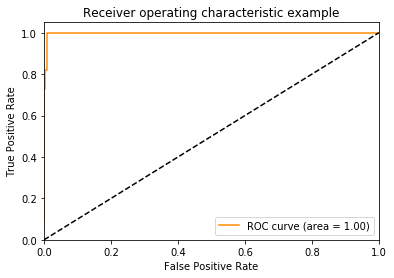

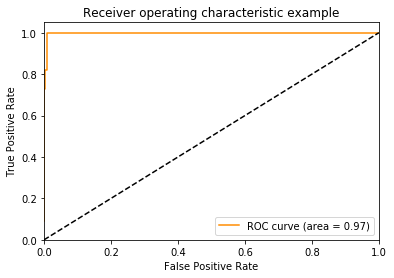

In [53]:

probaClasses = cla.predict_proba(Xv)
intent_bin=np.array(data_valid_clean['Intent']=='#6-49_TRTEINS_Peau')*1.0
proba_bin=probaClasses[:,np.where(cla.classes_=='#6-49_TRTEINS_Peau')[0][0]] #sur chq ligne une question prédire : les probas d'appartenance à chaque classe

intent_bin2=np.array(data_valid_clean['Intent']=='#6-97_TRTEINS_Nausees_Vomissements')*1.0
proba_bin2=probaClasses[:,np.where(cla.classes_=='#6-97_TRTEINS_Nausees_Vomissements')[0][0]] #sur chq ligne une question prédire : les probas d'appartenance à chaque classe

fpr, tpr, _ = roc_curve(intent_bin,proba_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

fpr2, tpr2, _ = roc_curve(intent_bin2,proba_bin2)
roc_auc2 = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Prédiction sur les données avec up-sampling

In [54]:
data_train_cleanOrigin = data_train_clean
data_up=data_train_clean
#effectif de chaque categories
CatCount= collections.Counter(data_train_cleanOrigin['Intent']).items()

In [55]:
#on echantillonne pour avoir le même nbre de questions dans chaque categorie
for k in range (np.shape(CatCount)[0]):
    if (CatCount[k][1] < 193): #le plus quand nbre de question est 193
        DfCat = (data_train_clean.loc[data_train_clean['Intent']== CatCount[k][0],:]) #on recupere les dataframe avec l'intent souhaite
        nbreLigneManquant = 193 - CatCount[k][1] #on regarde combien il manque de question
        if nbreLigneManquant < np.shape(DfCat)[0]: #lorsque on doit prendre quelques colonnes on tire aleatoirement
            DfCatRand = DfCat.sample(n=nbreLigneManquant)
            data_up = pd.concat([data_up, DfCatRand], ignore_index=True)#on concatene avec l'ancien dataframe        
        else:
            taille = np.shape(DfCat)[0]
            DfCatTemp = DfCat.append([DfCat]*193,ignore_index=True) #on cree un dataframe des categories manquantes assez gros pour pouvoir tirer aleatoirement les questions qu'on garde
            DfCatTemp = DfCatTemp.sample(n=nbreLigneManquant)
            data_up = pd.concat([data_up, DfCatTemp], ignore_index=True)

In [56]:
vec,X = vectorizer_train(data_up,"Question")
Y = data_up["Intent"].values
Xv = apply_vectorizer(data_valid_clean,vec,"Question")
Yv = data_valid_clean["Intent"].values

In [57]:
cla = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                          intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear',
                          max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
cla.fit(X,Y)
score=cla.score(X,Y)
Y_predict = cla.predict(X)
                
print('# training score:',score)

('# training score:', 0.95455674199155705)


In [58]:
## erreur en validation
scoreValidation=cla.score(Xv,Yv)
predict_v = cla.predict(Xv)
print('# validation score:',scoreValidation)

('# validation score:', 0.70119521912350602)


## Prédiction sur les meta-classses

In [59]:
#meta classe
categories = data_train_clean['Intent']
tailleCat = int(np.shape(categories)[0])
LabelCat = np.zeros(tailleCat)
for k in range(tailleCat):
    # la categorie #0 a le label 0 implicitement
    if categories[k][0:2]=='Pr':  LabelCat[k] = 11#profile
    if (categories[k][0:2] == 'co' or categories[k][0:2]=='Co'): LabelCat[k] = 10 #conversation_rappel_rendezvous
    if categories[k][0:2] == '#1' : LabelCat[k] = 1
    if categories[k][0:2] == '#2' : LabelCat[k] = 2
    if categories[k][0:2] == '#5' : LabelCat[k] = 5
    if categories[k][0:2] == '#6' : LabelCat[k] = 6
    if categories[k][0:2] == '#7' : LabelCat[k] = 7
    if categories[k][0:2] == '#8' : LabelCat[k] = 8
    if categories[k][0:2] == '#9' : LabelCat[k] = 9
        
#data frame avec une colonne mettant un label suivant la meta categorie
dfLabelCat = pd.DataFrame(LabelCat)
meta_df = pd.concat([data_train_clean, dfLabelCat], axis=1)


categories_v = data_valid_clean['Intent']
tailleCat_v = int(np.shape(categories_v)[0])
LabelCat_v = np.zeros(tailleCat_v)
for k in range(tailleCat_v):
    # la categorie #0 a le label 0 implicitement
    if categories_v[k][0:2]=='Pr':  LabelCat_v[k] = 11#profile
    if (categories_v[k][0:2] == 'co' or categories_v[k][0:2]=='Co'): LabelCat_v[k] = 10 #conversation_rappel_rendezvous
    if categories_v[k][0:2] == '#1' : LabelCat_v[k] = 1
    if categories_v[k][0:2] == '#2' : LabelCat_v[k] = 2
    if categories_v[k][0:2] == '#5' : LabelCat_v[k] = 5
    if categories_v[k][0:2] == '#6' : LabelCat_v[k] = 6
    if categories_v[k][0:2] == '#7' : LabelCat_v[k] = 7
    if categories_v[k][0:2] == '#8' : LabelCat_v[k] = 8
    if categories_v[k][0:2] == '#9' : LabelCat_v[k] = 9
        
#data frame avec une colonne mettant un label suivant la meta categorie
dfLabelCat_v = pd.DataFrame(LabelCat_v)
meta_df_v = pd.concat([data_valid_clean, dfLabelCat_v], axis=1)

In [60]:
vec,X_m = vectorizer_train(meta_df,"Question")
Y_m = meta_df[0].values #les étiquettes : les catégories
Xv_m = apply_vectorizer(meta_df_v,vec,"Question")
Yv_m = meta_df_v[0].values

In [61]:
cla_meta = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1, fit_intercept=True,
                          intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear',
                          max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
cla_meta.fit(X_m,Y_m)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
training_score=cla_meta.score(X_m,Y_m)
print "training score = "
print training_score

training score = 
0.885391265795


In [63]:
v_score=cla_meta.score(Xv_m,Yv_m)
print "valid score = "
print v_score

valid score = 
0.830677290837


### Comparaison effectif reel dans l'échantillon testé et résultat de la prédiction

#### Effectifs reels

In [64]:
sorted(collections.Counter(meta_df_v[0]).items(), key=lambda x : x[1], reverse=True)

[(2.0, 218),
 (6.0, 197),
 (9.0, 32),
 (10.0, 20),
 (1.0, 9),
 (0.0, 7),
 (8.0, 7),
 (7.0, 6),
 (5.0, 5),
 (11.0, 1)]

#### Effectifs de la prédiction

In [65]:
predict_meta_v=cla_meta.predict(Xv_m)
sorted(collections.Counter(predict_meta_v).items(), key=lambda x : x[1], reverse=True)

[(2.0, 240), (6.0, 226), (9.0, 17), (10.0, 15), (1.0, 2), (7.0, 2)]

#### Roc curves

In [66]:
probaClasses_meta=cla_meta.predict_proba(Xv_m)

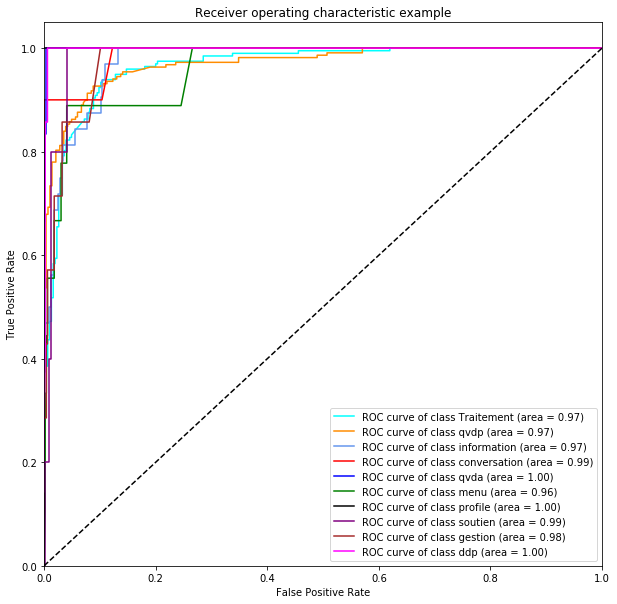

In [67]:
l=[6.0,2.0,9.0,10.0,7.0,1.0,11.0,5.0,0.0,8.0]
l1=["Traitement","qvdp","information","conversation","qvda","menu","profile","soutien","gestion","ddp"]
intent_bin=[]
proba_bin=[]
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(0,10,1):
    intent_bin.append(np.array(meta_df_v[0]==l[i])*1.0)
    proba_bin.append(probaClasses_meta[:,np.where(cla_meta.classes_==l[i])[0][0]])
    fpr[i], tpr[i], _ = roc_curve(intent_bin[i],proba_bin[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10,10))
colors=(['aqua','darkorange','cornflowerblue','red','blue','green','black','purple','brown','magenta'])
for i, color in zip(range(10),colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})' ''.format(l1[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
